## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [4]:
!pip install pandas_datareader

  Obtaining dependency information for pandas_datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/109.5 kB 330.3 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/109.5 kB 544.7 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 708.7 kB/s eta 0:00:00


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

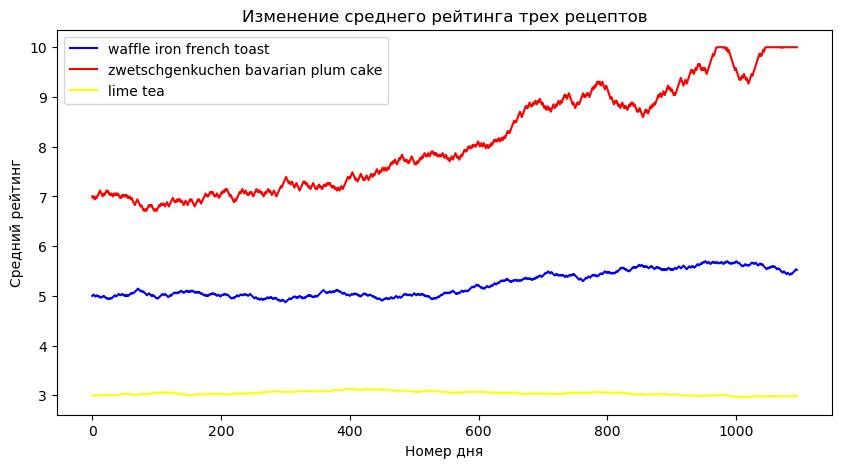

In [5]:
data=np.load('average_ratings.npy')
days = np.arange(data.shape[1])
plt.figure(figsize=(10,5))
plt.plot(days, data[0], label='waffle iron french toast', color='blue')
plt.plot(days, data[1], label='zwetschgenkuchen bavarian plum cake', color='red')
plt.plot(days, data[2], label='lime tea', color='yellow')

plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

plt.legend()
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


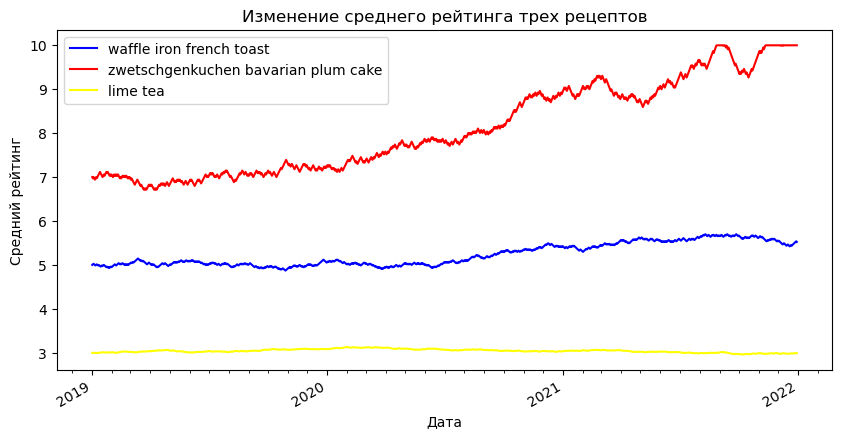

In [6]:
data=np.load('average_ratings.npy')

dates=pd.date_range(start='1/1/2019',end='30/12/2021', freq='D')

plt.figure(figsize=(10,5))
plt.plot(dates, data[0], label='waffle iron french toast', color='blue')
plt.plot(dates, data[1], label='zwetschgenkuchen bavarian plum cake', color='red')
plt.plot(dates, data[2], label='lime tea', color='yellow')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

plt.legend()
plt.gcf().autofmt_xdate()
plt.show()



3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

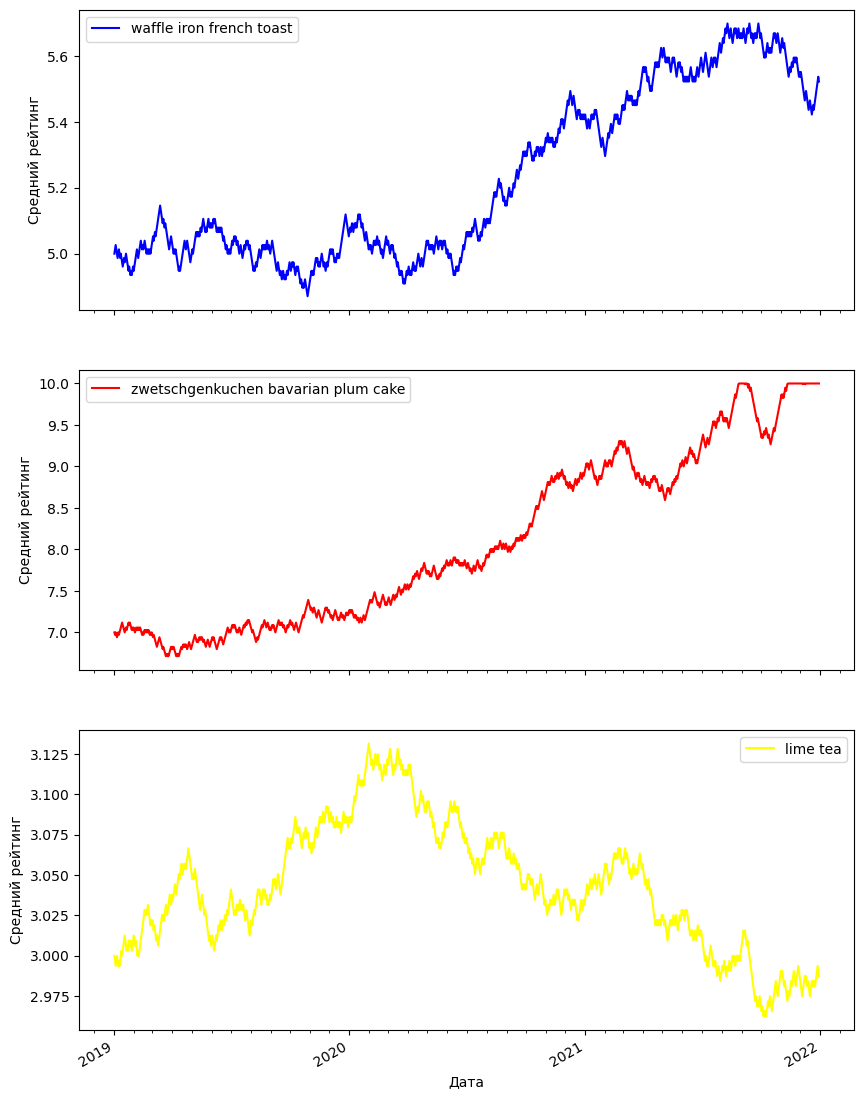

In [10]:
data=np.load('average_ratings.npy')

dates=pd.date_range(start='1/1/2019',end='30/12/2021', freq='D')

fig, axs = plt.subplots(3,1, figsize=(10,15), sharex=True) #создаем фигуру и массив подграфиков axxs три графика и по верткиали
#затем размер и по какая горизонталь общая
axs[0].plot(dates, data[0], label='waffle iron french toast', color='blue')
axs[1].plot(dates, data[1], label='zwetschgenkuchen bavarian plum cake', color='red')
axs[2].plot(dates, data[2], label='lime tea', color='yellow')

axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2].xaxis.set_minor_locator(mdates.MonthLocator())

axs[2].set_xlabel('Дата')
axs[0].set_ylabel('Средний рейтинг')
axs[1].set_ylabel('Средний рейтинг')
axs[2].set_ylabel('Средний рейтинг')


axs[0].legend()
axs[1].legend()
axs[2].legend()
fig.autofmt_xdate()
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


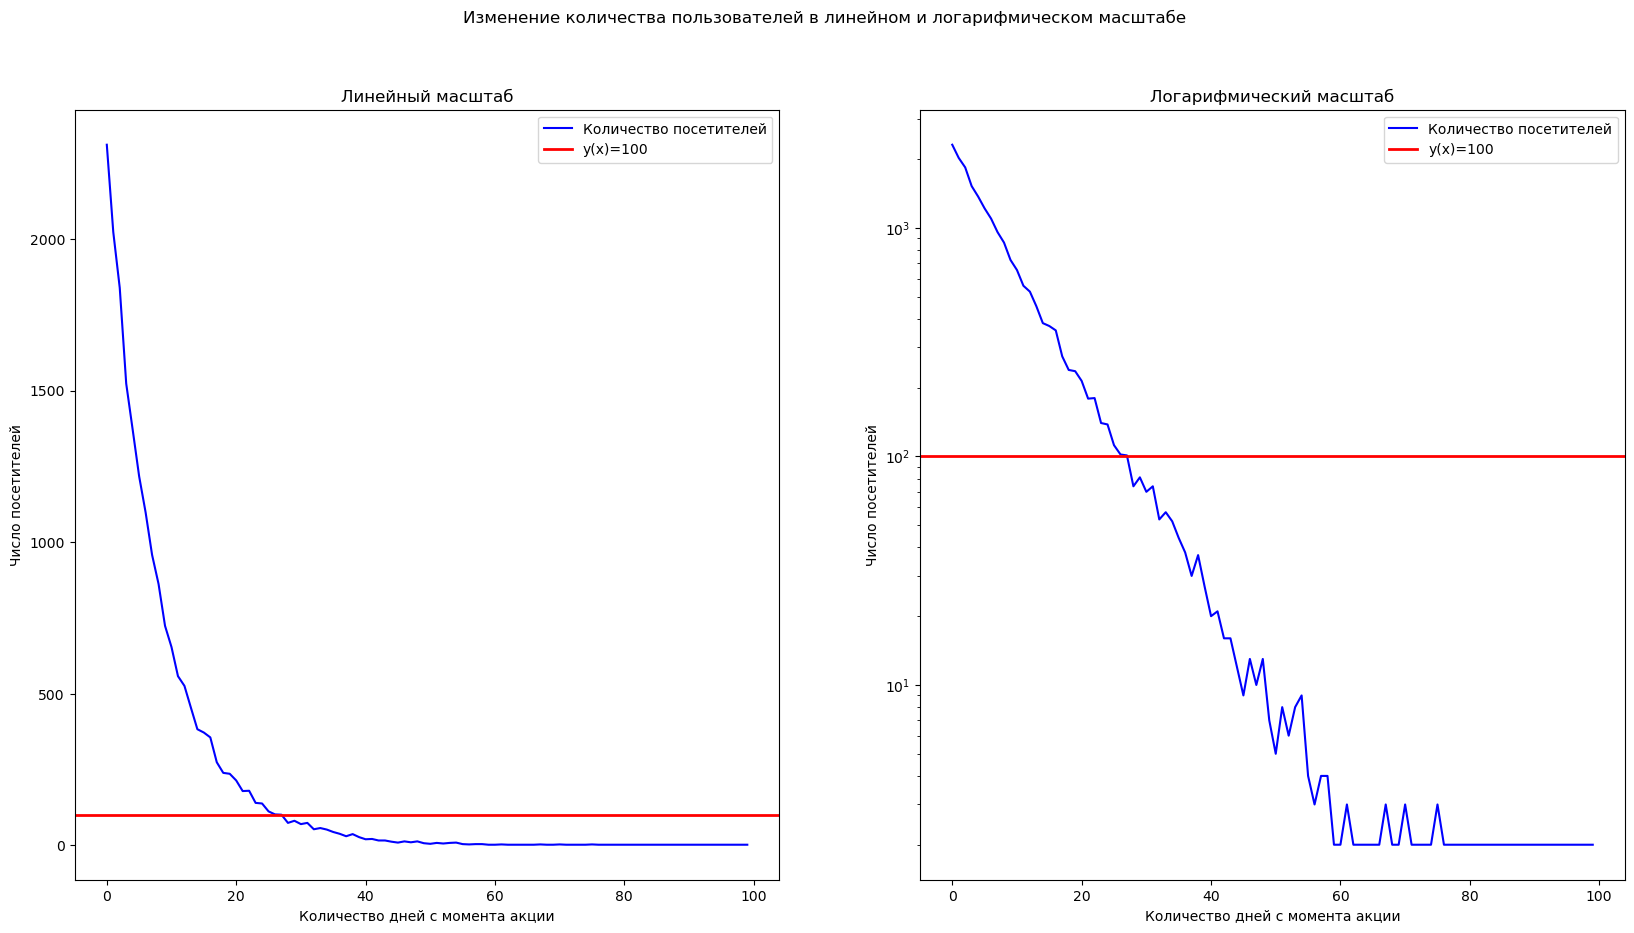

In [11]:
visitors = np.load('visitors.npy')

# Создание фигуры и двух подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(visitors, 'b-', label='Количество посетителей')
ax1.axhline(100, color='red', linewidth=2, label='y(x)=100')
ax1.set_title('Линейный масштаб')
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax1.legend()

# График с логарифмическим масштабом
ax2.plot(visitors, 'b-', label='Количество посетителей')
ax2.axhline(100, color='red', linewidth=2, label='y(x)=100')
ax2.set_yscale('log')
ax2.set_title('Логарифмический масштаб')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')
ax2.legend()

# Общий заголовок для фигуры
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

# Отображение графика
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [25]:
reviews = pd.read_csv('reviews_sample (2).csv')
recipes = pd.read_csv('recipes_sample (2).csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

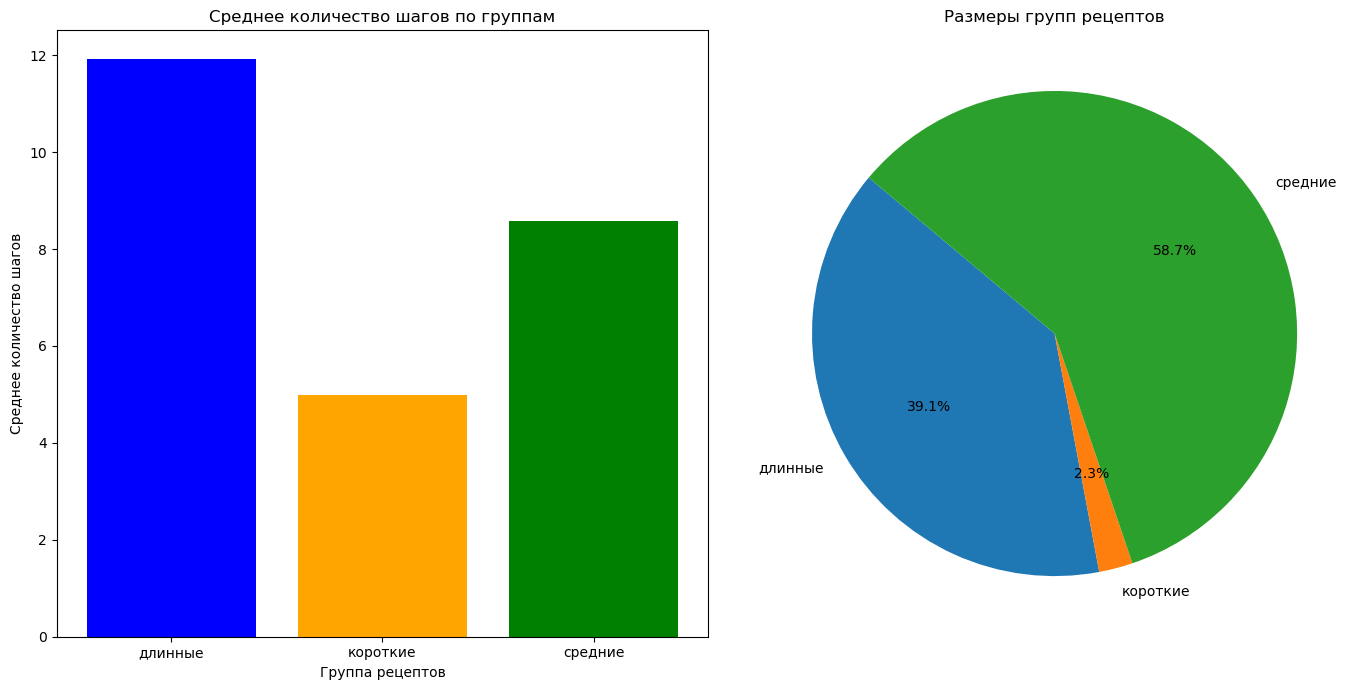

In [13]:
conditions = [
    (recipes['minutes'] < 5),
    (recipes['minutes'] >= 5) & (recipes['minutes'] < 50),
    (recipes['minutes'] >= 50)
]
choices = ['короткие', 'средние', 'длинные']
recipes['group'] = np.select(conditions, choices)

# Группировка и расчет среднего количества шагов и размера группы
grouped = recipes.groupby('group')['n_steps'].agg(['mean', 'size']).reset_index()

# Построение столбчатой диаграммы
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1) # два графика рядом
plt.bar(grouped['group'], grouped['mean'], color=['blue', 'orange', 'green'])
plt.xlabel('Группа рецептов')
plt.ylabel('Среднее количество шагов')
plt.title('Среднее количество шагов по группам')

# Построение круговой диаграммы
plt.subplot(1, 2, 2)
plt.pie(grouped['size'], labels=grouped['group'], autopct='%1.1f%%', startangle=140)
plt.title('Размеры групп рецептов')


plt.tight_layout()
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

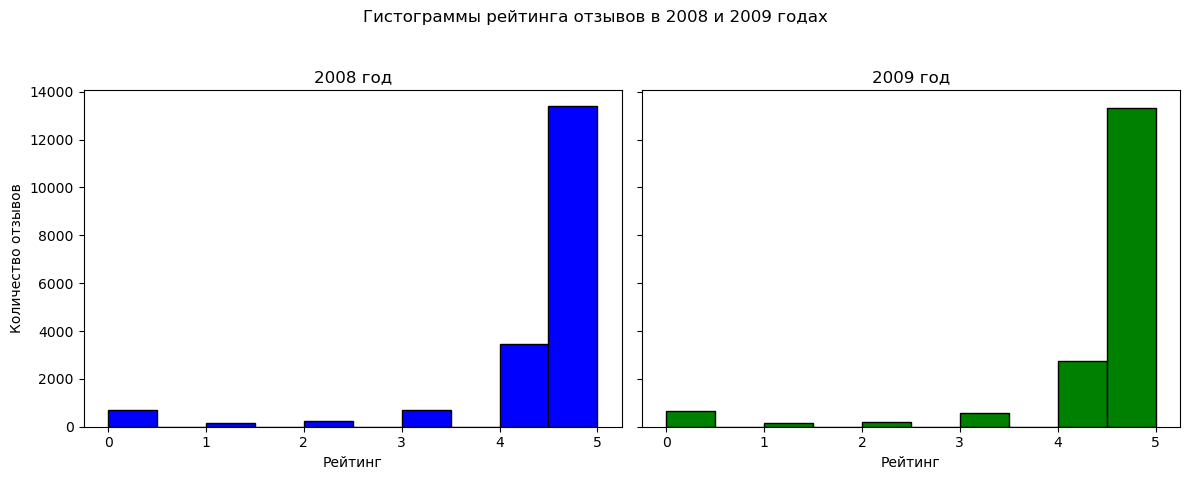

In [15]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews_2008 = reviews[reviews['date'].dt.year == 2008]
reviews_2009 = reviews[reviews['date'].dt.year == 2009]

fig,axes = plt.subplots(1,2, figsize=(12,5), sharey=True) # sharey=True для общей оси Y

axes[0].hist(reviews_2008['rating'], bins=10, color='blue', edgecolor='black')
axes[0].set_title('2008 год')
axes[0].set_xlabel('Рейтинг')
axes[0].set_ylabel('Количество отзывов')


axes[1].hist(reviews_2009['rating'], bins=10, color='green', edgecolor='black')
axes[1].set_title('2009 год')
axes[1].set_xlabel('Рейтинг')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Адаптация layout под общую подпись
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

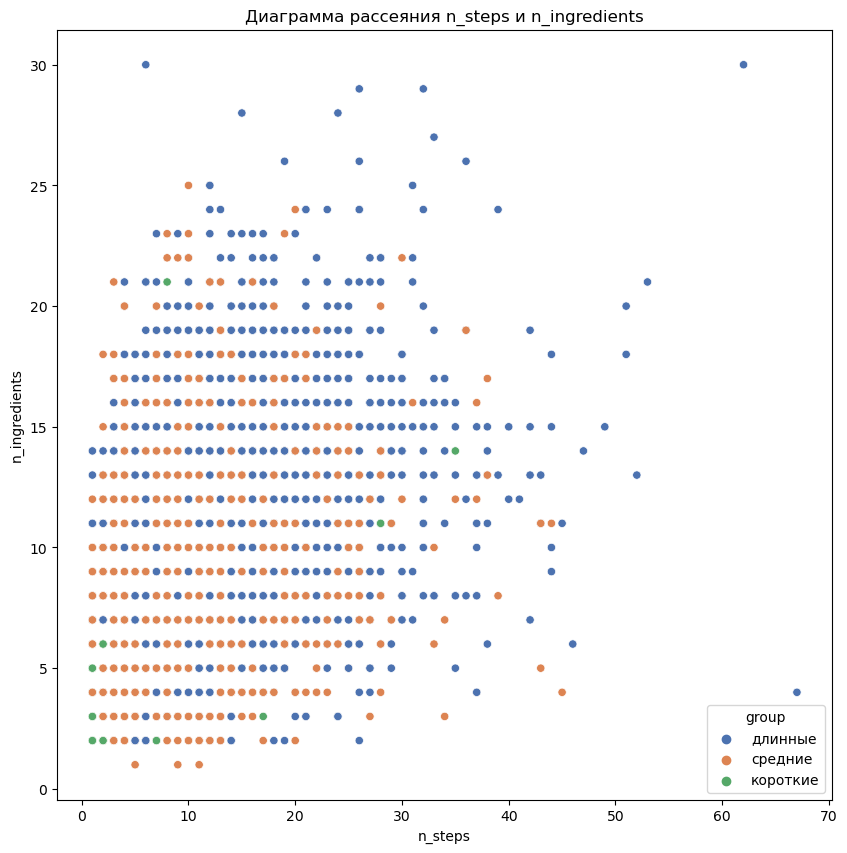

In [19]:
import seaborn as sns

# Создание диаграммы рассеяния
plt.figure(figsize=(10, 10))
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='group', palette='deep')

# Добавление заголовка
plt.title('Диаграмма рассеяния n_steps и n_ingredients')

# Отображение диаграммы
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

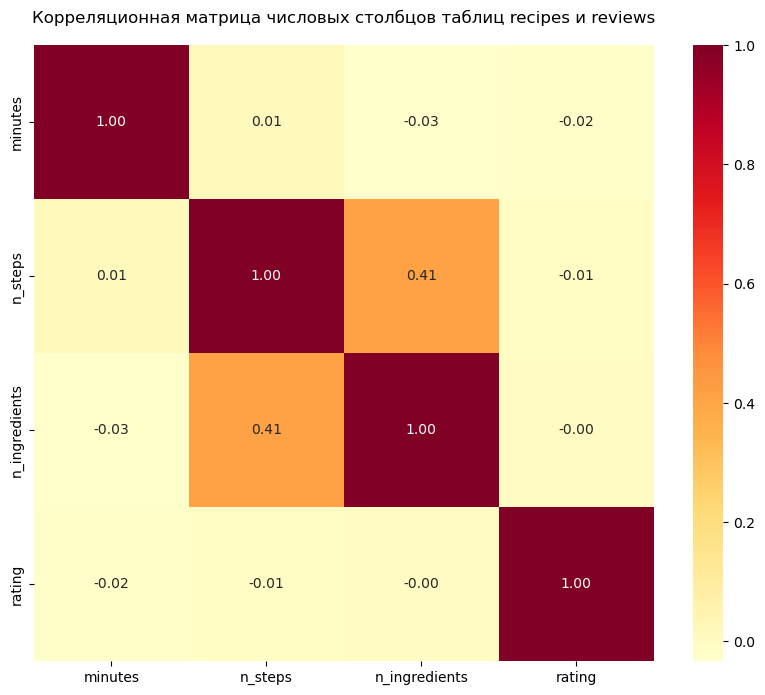

In [26]:
combined = pd.merge(recipes, reviews, on='id')

# Вычисление корреляционной матрицы для интересующих столбцов
correlation_matrix = combined[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='YlOrRd')
heatmap.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', pad=16)
plt.show()